# Basic Operations

In this tutorial, we introduce the basic operations of proxies with `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = p2k.ProxyDatabase().from_df(df)
pdb

Once the `ProxyDatabase` is created, we have `ProxyDatabase.records` as a dictionary of `ProxyRecord`.

In [4]:
i = 0
for pid, pobj in pdb.records.items():
    print(pid, pobj)
    i += 1
    if i >= 5:
        break

NAm_153 <p2k.proxy.ProxyRecord object at 0x7fe8a980eb80>
Asi_245 <p2k.proxy.ProxyRecord object at 0x7fe8a980ea30>
NAm_165 <p2k.proxy.ProxyRecord object at 0x7fe8a8ac3790>
Asi_178 <p2k.proxy.ProxyRecord object at 0x7fe8a980ea90>
Asi_174 <p2k.proxy.ProxyRecord object at 0x7fe8a980ec10>


## Slice a `ProxyRecord`

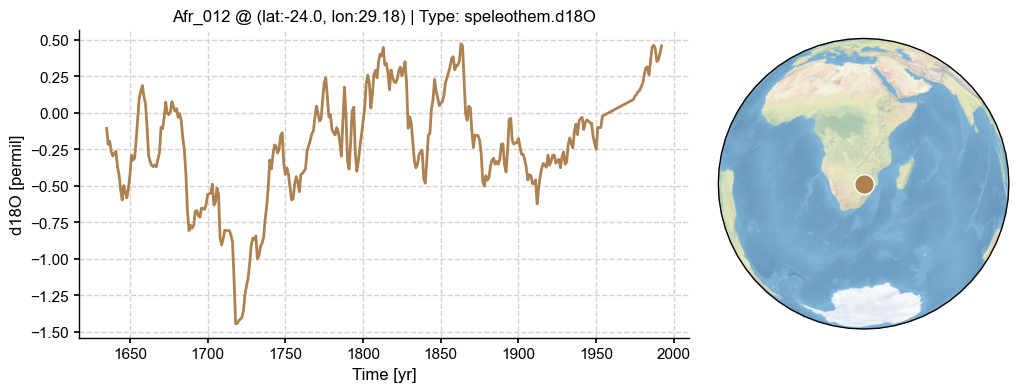

In [28]:
pobj = pdb.records['Afr_012']
fig, ax = pobj.plot()

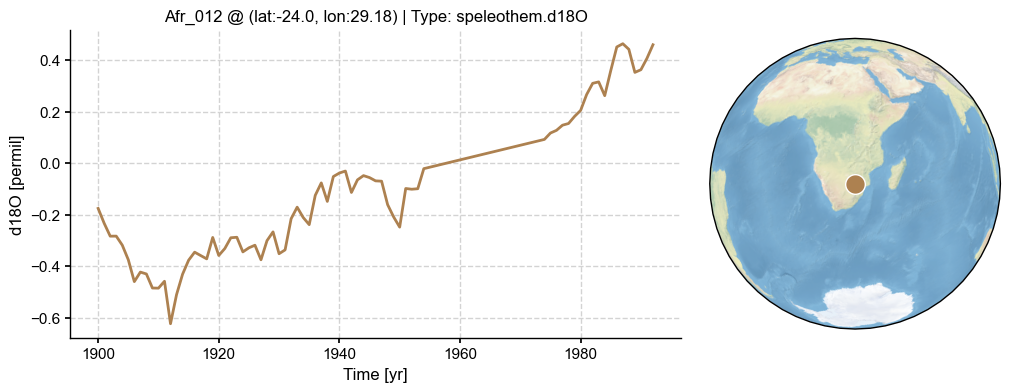

In [29]:
fig, ax = pobj.slice([1900, 2000]).plot()

## Add several `ProxyRecord`s together to form a `ProxyDatabase`

In [5]:
pdb_sub = pdb.records['NAm_153'] + pdb.records['Afr_005']
pdb_sub.records

{'NAm_153': <p2k.proxy.ProxyRecord at 0x7fe8aa61b4f0>,
 'Afr_005': <p2k.proxy.ProxyRecord at 0x7fe891d3d460>}

## Add a list of `ProxyRecord`s into an existing `ProxyDatabase`

In [6]:
pobj_list = list(pdb.records.values())[:5]
pdb_sub = p2k.ProxyDatabase()

for pobj in pobj_list:
    pdb_sub += pobj
    
pdb_sub.records

{'NAm_153': <p2k.proxy.ProxyRecord at 0x7fe8aa61bd60>,
 'Asi_245': <p2k.proxy.ProxyRecord at 0x7fe8aa61bdf0>,
 'NAm_165': <p2k.proxy.ProxyRecord at 0x7fe8aa61be20>,
 'Asi_178': <p2k.proxy.ProxyRecord at 0x7fe8aa61be80>,
 'Asi_174': <p2k.proxy.ProxyRecord at 0x7fe8a980ec10>}

## Merge several `ProxyDatabase`s

In [7]:
pobj_list = list(pdb.records.values())[:5]
pdb_sub1 = p2k.ProxyDatabase()
for pobj in pobj_list:
    pdb_sub1 += pobj
        
pobj_list = list(pdb.records.values())[10:15]
pdb_sub2 = p2k.ProxyDatabase()
for pobj in pobj_list:
    pdb_sub2 += pobj
        
pdb_sub = pdb_sub1 + pdb_sub2
pdb_sub.records

{'NAm_153': <p2k.proxy.ProxyRecord at 0x7fe8aa623850>,
 'Asi_245': <p2k.proxy.ProxyRecord at 0x7fe8aa623d30>,
 'NAm_165': <p2k.proxy.ProxyRecord at 0x7fe8aa623d90>,
 'Asi_178': <p2k.proxy.ProxyRecord at 0x7fe8aa6237f0>,
 'Asi_174': <p2k.proxy.ProxyRecord at 0x7fe8aa623e50>,
 'NAm_102': <p2k.proxy.ProxyRecord at 0x7fe8aa623910>,
 'NAm_046': <p2k.proxy.ProxyRecord at 0x7fe8aa623c40>,
 'Ocn_065': <p2k.proxy.ProxyRecord at 0x7fe8aa623ca0>,
 'Asi_242': <p2k.proxy.ProxyRecord at 0x7fe8aa623d00>,
 'Asi_170': <p2k.proxy.ProxyRecord at 0x7fe8a980edf0>}

## Substract a list of `ProxyRecord`s from a `ProxyDatabase`

In [8]:
pdb_left = pdb_sub - pdb_sub1
pdb_left.records

{'NAm_102': <p2k.proxy.ProxyRecord at 0x7fe8aa61baf0>,
 'NAm_046': <p2k.proxy.ProxyRecord at 0x7fe8aa61b1c0>,
 'Ocn_065': <p2k.proxy.ProxyRecord at 0x7fe8aa623400>,
 'Asi_242': <p2k.proxy.ProxyRecord at 0x7fe8aa6232b0>,
 'Asi_170': <p2k.proxy.ProxyRecord at 0x7fe8aa6233a0>}

If the `ProxyRecord` to remove does not exist, a warning will prompt.

In [9]:
pdb_left = pdb_sub - pdb.records['Ocn_001'] - pdb.records['NAm_153']
pdb_left.records

{'Asi_245': <p2k.proxy.ProxyRecord at 0x7fe8c1190490>,
 'NAm_165': <p2k.proxy.ProxyRecord at 0x7fe8c11904f0>,
 'Asi_178': <p2k.proxy.ProxyRecord at 0x7fe8c1190550>,
 'Asi_174': <p2k.proxy.ProxyRecord at 0x7fe8c11905b0>,
 'NAm_102': <p2k.proxy.ProxyRecord at 0x7fe8c1190610>,
 'NAm_046': <p2k.proxy.ProxyRecord at 0x7fe8c1190670>,
 'Ocn_065': <p2k.proxy.ProxyRecord at 0x7fe8c11906d0>,
 'Asi_242': <p2k.proxy.ProxyRecord at 0x7fe8c1190730>,
 'Asi_170': <p2k.proxy.ProxyRecord at 0x7fe8c1190790>}

## Substract a `ProxyDatabase` from another

In [10]:
pdb_right = pdb_sub - pdb_left
pdb_right.records

{'NAm_153': <p2k.proxy.ProxyRecord at 0x7fe8aa6238b0>}

## Filter a `ProxyDatabase`

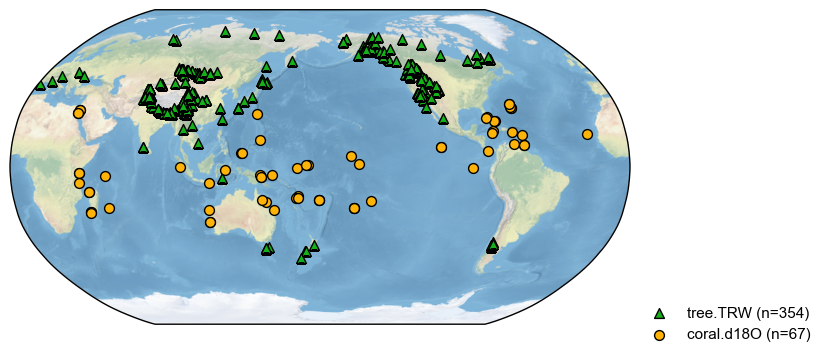

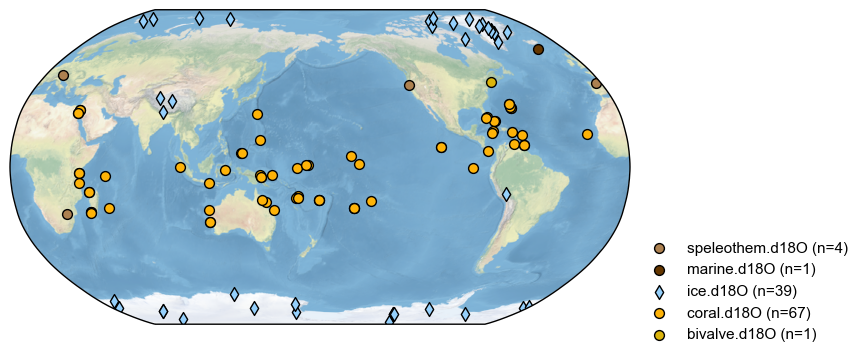

In [11]:
# by proxy type
pdb_TRW = pdb.filter(by='ptype', keys=['tree.TRW', 'coral.d18O'])
fig, ax = pdb_TRW.plot(plot_count=False)

pdb_TRW = pdb.filter(by='ptype', keys=['d18O'])
fig, ax = pdb_TRW.plot(plot_count=False)

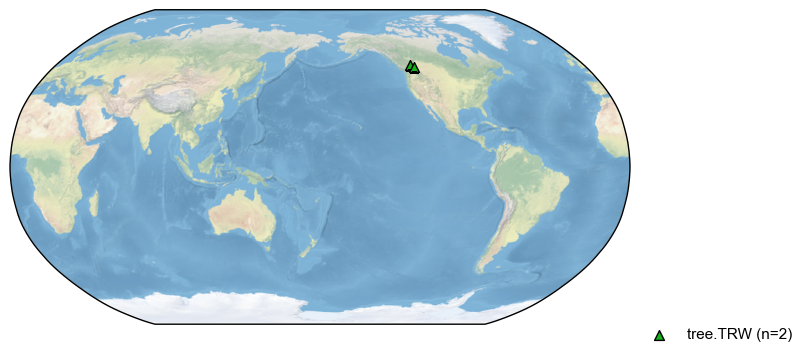

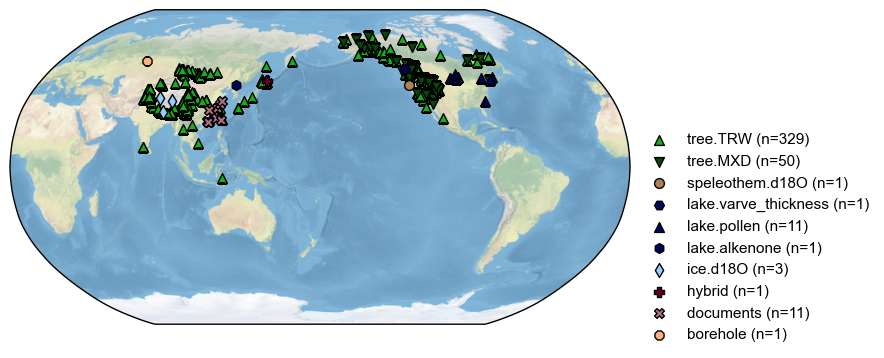

In [12]:
# by proxy id
pdb_NAm = pdb.filter(by='pid', keys=['NAm_153', 'NAm_154'])
fig, ax = pdb_NAm.plot(plot_count=False)

pdb_NAm_Asi = pdb.filter(by='pid', keys=['NAm', 'Asi'])
fig, ax = pdb_NAm_Asi.plot(plot_count=False)

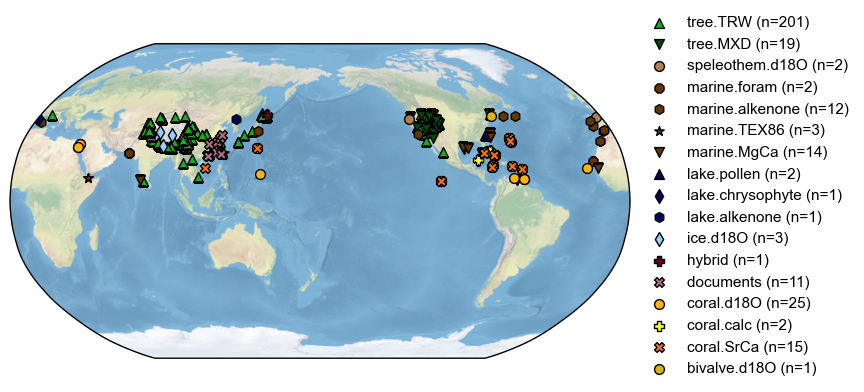

In [13]:
# by latitude
pdb_sub = pdb.filter(by='lat', keys=[10, 45])
fig, ax = pdb_sub.plot(plot_count=False)
p2k.closefig()

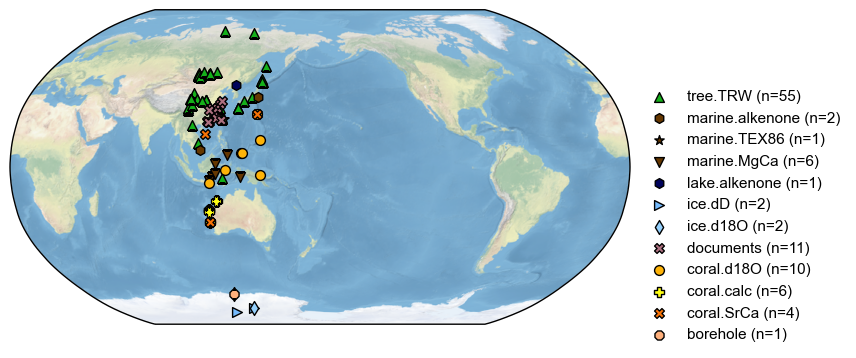

In [14]:
# by longitude
pdb_sub = pdb.filter(by='lon', keys=[100, 145])
fig, ax = pdb_sub.plot(plot_count=False)
p2k.closefig()

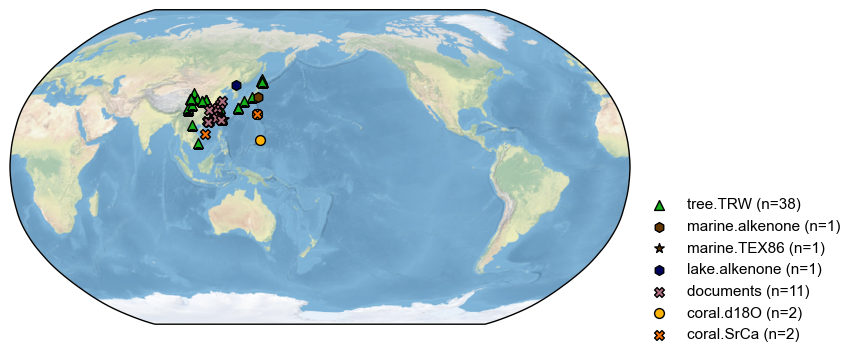

In [15]:
# by location in a square
pdb_sub = pdb.filter(by='loc-square', keys=[10, 45, 100, 145])
fig, ax = pdb_sub.plot(plot_count=False)
p2k.closefig()

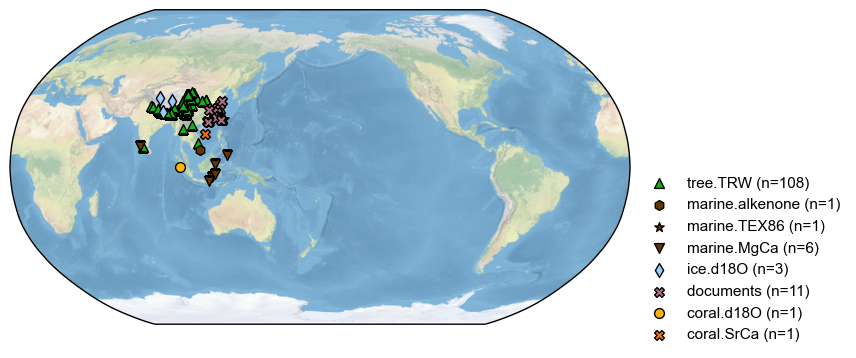

In [16]:
# by location in a circle
pdb_sub = pdb.filter(by='loc-circle', keys=[15, 100, 3000])
fig, ax = pdb_sub.plot(plot_count=False)
p2k.closefig()

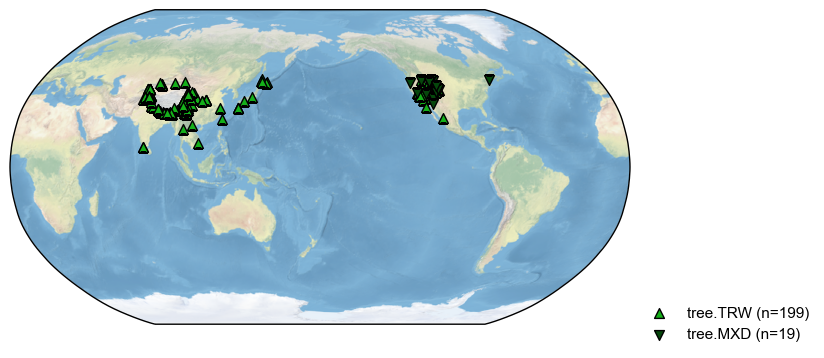

In [17]:
# combination
pdb_sub = pdb.filter(by='pid', keys=['NAm', 'Asi']).filter(by='ptype', keys=['tree.TRW', 'tree.MXD']).filter(by='lat', keys=[10, 45])
fig, ax = pdb_sub.plot(plot_count=False)
p2k.closefig()

## Convert a `ProxyRecord` to an `xarray.DataArray`

In [25]:
da = pdb.records['NAm_153'].to_da()
da

<xarray.DataArray 'NAm_153' (time: 434)>
array([0.883, 0.942, 1.043, 0.945, 1.141, 0.715, 0.693, 0.63 , 0.662,
       0.667, 0.668, 0.645, 0.711, 0.943, 0.735, 0.717, 0.788, 0.756,
       0.79 , 0.668, 0.711, 0.858, 0.84 , 0.827, 0.914, 1.001, 0.964,
       0.994, 1.058, 1.055, 1.187, 1.111, 1.064, 1.071, 0.862, 0.956,
       1.168, 1.085, 0.948, 0.949, 1.149, 1.197, 1.345, 0.981, 1.185,
       1.107, 1.071, 1.15 , 0.894, 1.157, 1.068, 1.201, 0.968, 0.906,
       0.98 , 0.954, 0.829, 0.863, 0.999, 1.034, 0.984, 0.79 , 0.776,
       0.868, 0.767, 0.801, 0.887, 0.856, 0.701, 0.924, 1.247, 1.28 ,
       1.257, 1.192, 1.182, 0.924, 0.864, 0.825, 0.907, 0.766, 0.828,
       0.768, 0.728, 0.932, 1.212, 1.076, 0.975, 0.629, 0.497, 0.739,
       0.56 , 0.675, 0.648, 0.8  , 0.829, 0.797, 0.956, 0.925, 0.943,
       0.861, 0.853, 0.755, 0.717, 0.714, 0.813, 0.95 , 0.926, 0.831,
       0.903, 1.092, 1.075, 1.274, 1.089, 1.038, 1.118, 1.028, 1.165,
       1.258, 1.153, 0.995, 1.061, 1.02 , 0.95 , 0.754, 0.833, 0.852,
       1.05 , 0.919, 0.962, 1.006, 0.81 , 0.652, 0.787, 0.779, 0.741,
       1.012, 0.656, 1.047, 0.639, 0.778, 0.835, 0.776, 1.212, 1.261,
       1.229, 1.203, 1.123, 1.515, 1.422, 1.175, 1.466, 1.401, 1.198,
       1.222, 1.156, 1.215, 1.001, 0.814, 0.891, 0.939, 0.75 , 0.851,
       0.737, 0.871, 0.789, 0.688, 0.748, 0.931, 0.821, 0.961, 0.995,
       1.126, 0.892, 1.096, 0.921, 1.061, 0.937, 0.917, 1.051, 0.983,
...
       0.64 , 1.013, 1.002, 0.834, 0.963, 1.057, 1.13 , 0.905, 0.851,
       1.018, 1.053, 1.128, 0.709, 0.809, 0.778, 1.119, 0.954, 0.883,
       0.987, 0.863, 0.659, 0.875, 0.678, 0.846, 0.952, 0.725, 0.875,
       0.766, 0.893, 0.706, 0.707, 0.897, 0.767, 0.939, 0.877, 0.987,
       0.83 , 0.913, 1.086, 1.22 , 0.823, 1.082, 1.108, 0.834, 1.083,
       0.945, 0.859, 1.009, 0.862, 0.65 , 0.683, 0.81 , 0.683, 0.708,
       0.881, 0.945, 1.002, 0.862, 0.981, 0.892, 0.875, 0.95 , 1.174,
       0.891, 0.853, 0.79 , 1.052, 1.166, 1.031, 0.821, 1.081, 1.024,
       1.008, 1.056, 1.103, 0.893, 0.864, 0.922, 0.884, 1.025, 1.107,
       0.841, 1.042, 0.895, 0.953, 0.882, 0.902, 1.035, 1.018, 1.079,
       1.115, 0.979, 1.049, 0.846, 0.605, 0.633, 0.733, 0.705, 0.917,
       0.888, 0.888, 1.146, 1.277, 1.075, 1.166, 0.912, 1.048, 1.002,
       1.015, 1.259, 1.114, 1.272, 1.304, 1.215, 1.246, 0.962, 1.277,
       1.211, 1.08 , 1.055, 1.192, 1.144, 0.972, 1.026, 1.329, 1.046,
       1.386, 1.073, 1.028, 0.898, 1.039, 1.08 , 0.769, 0.787, 1.145,
       1.021, 1.091, 1.027, 0.766, 1.064, 1.146, 1.324, 1.072, 1.278,
       1.   , 1.316, 1.384, 0.788, 0.896, 1.151, 0.936, 1.239, 0.867,
       1.163, 1.286, 1.272, 1.057, 1.205, 1.271, 1.266, 1.409, 1.371,
       1.238, 1.338, 1.248, 1.173, 1.204, 0.947, 0.967, 1.019, 1.2  ,
       1.093, 1.346])
Coordinates:
  * time     (time) object 1563-01-01 00:00:00 ... 1996-01-01 00:00:00
Attributes:
    lat:         52.7
    lon:         241.7
    ptype:       tree.TRW
    dt:          1.0
    time_name:   Time
    time_unit:   yr
    value_name:  trsgi
    value_unit:  NA

## Save a `ProxyRecord` to a NetCDF file

In [34]:
pdb.records['NAm_153'].to_nc('./data/NAm_153.nc')

ProxyRecord saved at: ./data/NAm_153.nc


## Load the NetCDF file and create a `ProxyRecord` from it

<xarray.Dataset>
Dimensions:  (time: 434)
Coordinates:
  * time     (time) object 1563-01-01 00:00:00 ... 1996-01-01 00:00:00
Data variables:
    NAm_153  (time) float64 ...


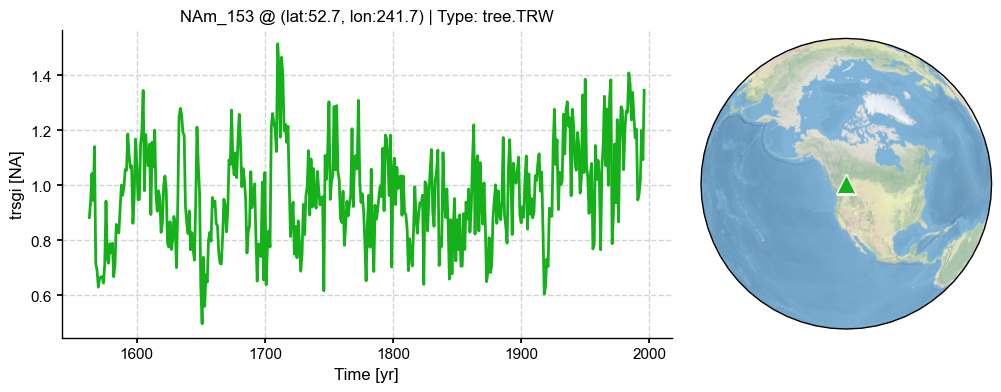

In [40]:
with xr.open_dataset('./data/NAm_153.nc') as ds:
    print(ds)
    pobj = p2k.ProxyRecord().from_da(ds['NAm_153'])
    fig, ax = pobj.plot()